# Recommendation system 

In [1]:
''' In this system we are going to create a movie recommendation system we 
are going to recommand movies based of the similar features'''

' In this system we are going to create a movie recommendation system we \nare going to recommand movies based of the similar features'

In [2]:
import pandas as pd
import numpy as np

In [3]:
column_names = ['user_id','item_id','rating','timestamp']

In [4]:
df = pd.read_csv('u.data',sep='\t',names=column_names)

In [5]:
df.head(2)

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949


In [6]:
movie_titles = pd.read_csv('Movie_Id_Titles')

In [7]:
movie_titles.head(2)

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)


In [8]:
df = pd.merge(df,movie_titles,on='item_id')

In [9]:
df.head(3)

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)


In [10]:
# now grab the rating column with avg rating based on title

In [11]:
df.groupby('title')['rating'].mean()

title
'Til There Was You (1997)                2.333333
1-900 (1994)                             2.600000
101 Dalmatians (1996)                    2.908257
12 Angry Men (1957)                      4.344000
187 (1997)                               3.024390
                                           ...   
Young Guns II (1990)                     2.772727
Young Poisoner's Handbook, The (1995)    3.341463
Zeus and Roxanne (1997)                  2.166667
unknown                                  3.444444
Á köldum klaka (Cold Fever) (1994)       3.000000
Name: rating, Length: 1664, dtype: float64

In [12]:
df.groupby('title')['rating'].mean().sort_values(ascending=False)
# note that this is avg of the title it doesent mean that these movies
# has higher rating

title
They Made Me a Criminal (1939)                  5.0
Marlene Dietrich: Shadow and Light (1996)       5.0
Saint of Fort Washington, The (1993)            5.0
Someone Else's America (1995)                   5.0
Star Kid (1997)                                 5.0
                                               ... 
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
King of New York (1990)                         1.0
Touki Bouki (Journey of the Hyena) (1973)       1.0
Bloody Child, The (1996)                        1.0
Crude Oasis, The (1995)                         1.0
Name: rating, Length: 1664, dtype: float64

In [13]:
# I want to see the top 5 movies based of rating

In [14]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [15]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())

In [16]:
ratings.head(2)

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000


In [17]:
ratings['number of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())

In [18]:
ratings.head()

,rating,number of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


<AxesSubplot:>

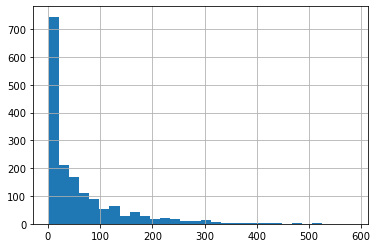

In [19]:
ratings['number of ratings'].hist(bins=30)

<AxesSubplot:>

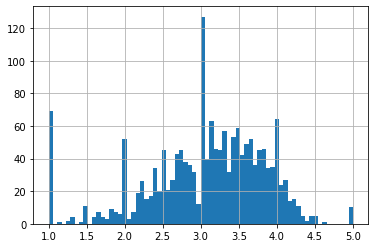

In [20]:
ratings['rating'].hist(bins=70)

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

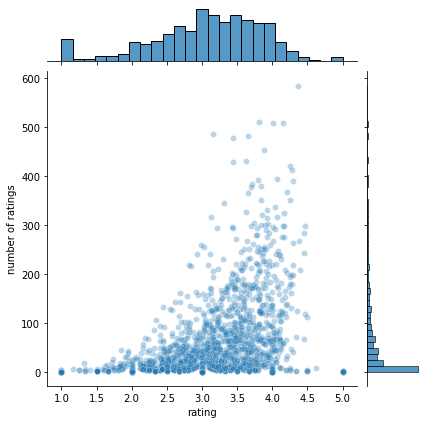

In [22]:
sns.jointplot(x='rating',y='number of ratings',data=ratings,alpha=0.3)

In [23]:
# now we will going to make a movie matrix 

In [24]:
moviemat = df.pivot_table(index='user_id',columns='title',values='rating')

In [25]:
moviemat

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
# lets see top 10 movies rating

In [27]:
ratings.sort_values(by='number of ratings',ascending=False).head(10)

,rating,number of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [28]:
starward_user_rating = moviemat['Star Wars (1977)']
liar_liar_rating = moviemat['Liar Liar (1997)']

In [29]:
starward_user_rating.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [30]:
liar_liar_rating.head()

user_id
0    NaN
1    NaN
2    1.0
3    2.0
4    5.0
Name: Liar Liar (1997), dtype: float64

In [31]:
 # now we will check the corr with starwrd rating with all the movies

In [32]:
similar_to_starwars = moviemat.corrwith(starward_user_rating)
similar_to_starwars

C:\Users\reliance\anaconda3\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\reliance\anaconda3\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


title
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [33]:
similar_to_liar = moviemat.corrwith(liar_liar_rating)
similar_to_liar

C:\Users\reliance\anaconda3\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\reliance\anaconda3\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


title
'Til There Was You (1997)                0.118913
1-900 (1994)                                  NaN
101 Dalmatians (1996)                    0.469765
12 Angry Men (1957)                      0.066272
187 (1997)                               0.175145
                                           ...   
Young Guns II (1990)                     0.352174
Young Poisoner's Handbook, The (1995)    0.445016
Zeus and Roxanne (1997)                 -0.500000
unknown                                  0.870388
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [34]:
# now clean the data

In [35]:
corr_starwars = pd.DataFrame(similar_to_starwars,columns=['correlation'])
corr_starwars.dropna(inplace=True)

In [36]:
corr_starwars.head()

,correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [37]:
# now I want only perfectly correlated data for starwars

In [38]:
corr_starwars.sort_values('correlation',ascending=False).head(10)

,correlation
title,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Star Wars (1977),1.0
Man of the Year (1995),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


In [39]:
# Add rating column

In [40]:
corr_starwars = corr_starwars.join(ratings['number of ratings'])

In [41]:
corr_starwars.head(10)

,correlation,number of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41
2 Days in the Valley (1996),0.066654,93
"20,000 Leagues Under the Sea (1954)",0.289768,72
2001: A Space Odyssey (1968),0.230884,259
"39 Steps, The (1935)",0.106453,59


In [42]:
corr_starwars[corr_starwars['number of ratings']>100].sort_values('correlation',
                                                                  ascending=False)

,correlation,number of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
...,...,...
"Edge, The (1997)",-0.127167,113
As Good As It Gets (1997),-0.130466,112
Crash (1996),-0.148507,128


In [43]:
corr_liar = pd.DataFrame(similar_to_liar,columns=['correlation'])

In [44]:
corr_liar.dropna(inplace=True)

In [45]:
corr_liar.head()

,correlation
title,
'Til There Was You (1997),0.118913
101 Dalmatians (1996),0.469765
12 Angry Men (1957),0.066272
187 (1997),0.175145
2 Days in the Valley (1996),0.040739


In [46]:
corr_liar = corr_liar.join(ratings['number of ratings'])

In [47]:
corr_liar.sort_values(by='correlation',ascending=False)

,correlation,number of ratings
title,,
"Bonheur, Le (1965)",1.0,4
For Ever Mozart (1996),1.0,3
Crossfire (1947),1.0,4
Johnny 100 Pesos (1993),1.0,2
Moonlight and Valentino (1995),1.0,7
...,...,...
Aparajito (1956),-1.0,7
"Quiet Room, The (1996)",-1.0,3
Germinal (1993),-1.0,4


In [48]:
# like this we have created the recommendation system for star_wars and liar_liar